In [3]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import math

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [9]:
# loading data
data = pd.read_csv('gys.csv')

# removing extra spaces and converting headers to lowercase
data.columns = [col_name.strip().lower() for col_name in data.columns]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [10]:
data['population'].isnull().sum()

123

In [11]:
import math
pop_mean = math.ceil(data['population'].dropna().mean())
pop_mean

430387267

In [12]:
data['video views'] = data['video views'].astype(int)
data['population'] = data['population'].fillna(pop_mean)
data['population'] = data['population'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    int32  
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [13]:
# Saving cleaned data to new dataframe
clean_data = data

In [14]:
# Creating dataframe for country population
pop_data = clean_data.sort_values(by='population', ascending=False).dropna()
selected_pop_data = pop_data[['country', 'population']]
selected_pop_data = selected_pop_data.drop_duplicates().head(5)
selected_pop_data

,country,population
507,China,1397715000
0,India,1366417754
87,United States,328239523
369,Indonesia,270203917
65,Pakistan,216565318


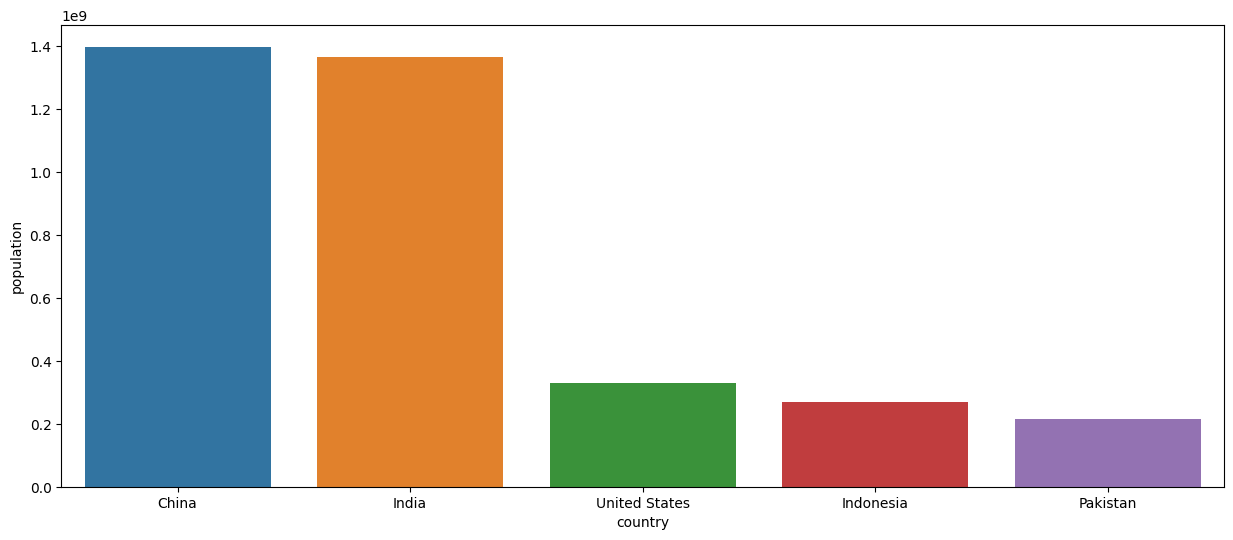

In [15]:
    # Graphing country population
mp.figure(figsize=(15, 6))
sns.barplot(data=selected_pop_data, x='country', y='population')
mp.show()

In [16]:
# Compute number of artist per country
country_artist_data = clean_data[['country','youtuber']].dropna()
country_artist_data['total count'] = country_artist_data.groupby('country')['youtuber'].transform('count')
country_artist_data['total count'] = country_artist_data['total count'].astype(int)
print(country_artist_data)

            country                    youtuber  total count
0             India                    T-Series          168
1     United States              YouTube Movies          313
2     United States                     MrBeast          313
3     United States  Cocomelon - Nursery Rhymes          313
4             India                   SET India          168
..              ...                         ...          ...
990          Brazil               Natan por Aï¿           62
991           India    Free Fire India Official          168
992  United Kingdom                       Panda           43
993          Sweden                 RobTopGames            4
994           India                Make Joke Of          168

[873 rows x 3 columns]


In [17]:
country_artist_data = country_artist_data[['country', 'total count']].drop_duplicates()
country_artist_data = country_artist_data.sort_values(by='total count', ascending=False).head(5)
country_artist_data

,country,total count
1,United States,313
0,India,168
23,Brazil,62
16,United Kingdom,43
71,Mexico,33


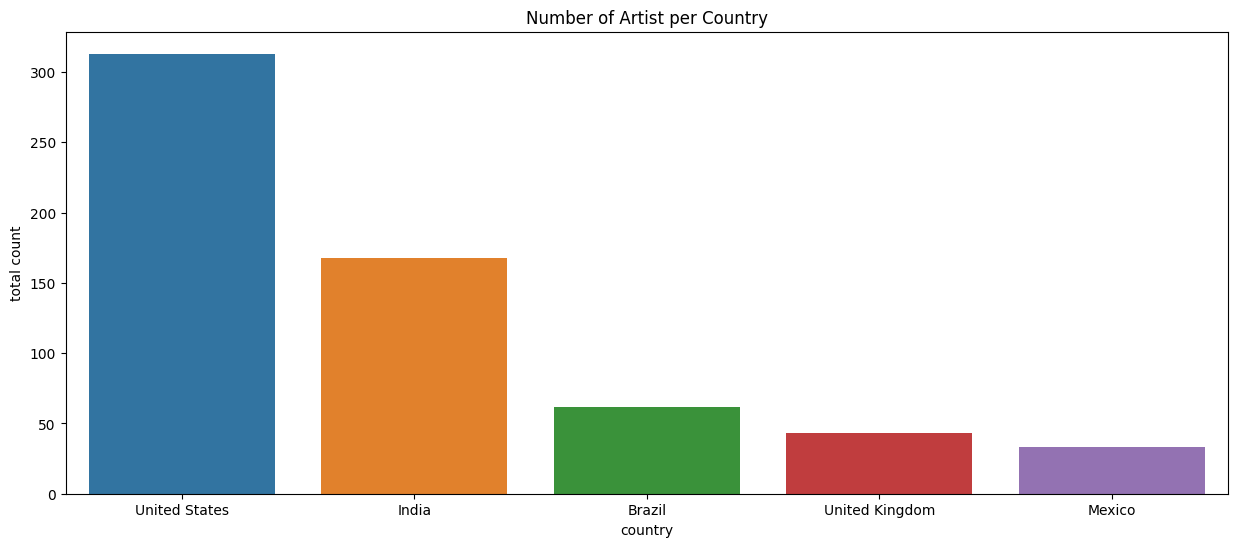

In [19]:
# Graping number of artist per country.
mp.figure(figsize=(15, 6))
sns.barplot(data=country_artist_data, x='country', y='total count')
mp.title('Number of Artist per Country')
mp.show()

In [20]:
upop_mean = math.ceil(clean_data['urban_population'].dropna().mean())
upop_mean

224214982

In [21]:
clean_data['urban_population'] = clean_data['urban_population'].fillna(upop_mean)
clean_data['urban_population'] = clean_data['urban_population'].astype(int)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    int32  
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [22]:
# create a new dataframe with country, youtuber, video views, population, urban_population
vp_data = clean_data[['country', 'youtuber', 'video views', 'population', 'urban_population']]
vp_data.loc[:, 'video views'] = vp_data.loc[:, 'video views'].apply(lambda x: abs(x))
vp_data = vp_data.sort_values(by='video views', ascending=False).head(20)
vp_data

,country,youtuber,video views,population,urban_population
0,India,T-Series,2147483648,1366417754,471031528
617,India,Volga Video,2147483648,1366417754,471031528
619,Singapore,MY FAMILY,2147483648,5703569,5703569
620,India,Team Films Bhojpuri,2147483648,1366417754,471031528
621,India,Zee Music Classic,2147483648,1366417754,471031528
622,United States,Prime Video India,2147483648,328239523,270663028
624,NaN,Kuplinov ï¿½ï¿½ï¿,2147483648,430387267,224214982
625,Canada,Linus Tech Tips,2147483648,36991981,30628482
626,Brazil,Juliana Baltar,2147483648,212559417,183241641
627,United States,5-Minute Crafts FAMILY,2147483648,328239523,270663028


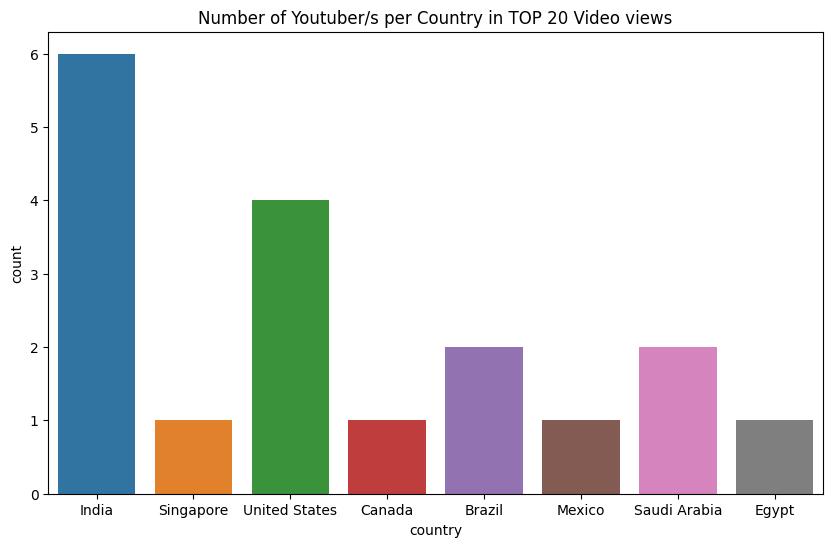

In [23]:
mp.figure(figsize=(10, 6))
sns.countplot(data=vp_data, x='country')
mp.title('Number of Youtuber/s per Country in TOP 20 Video views')
mp.show()

In [24]:
# Checking again for duplicates
test_data = clean_data
no_of_duplicates = test_data[test_data.duplicated(keep='first')].shape[0]
no_of_duplicates

0

In [25]:
# Get the absolute value from video views
test_data['video views'] = test_data.loc[:, 'video views'].apply(lambda x: abs(x))
test_data

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross tertiary education enrollment (%),population,unemployment rate,urban_population,latitude,longitude
0,1,T-Series,245000000,2147483648,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,3,MrBeast,166000000,2147483648,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,2147483648,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,2147483648,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,2147483648,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
992,993,Panda,12300000,2147483648,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


In [26]:
# Creating new dataframe and rechecking null values
category = test_data
category.dropna(subset=['category'], inplace=True)
category['category'].isna().sum()

0

In [27]:
# Getting count and views per category
category.loc[:, 'video views'] = category.loc[:, 'video views'].apply(lambda x: abs(x))
category['category count'] = category.groupby('category')['category'].transform('count')
category['category_views sum'] = category.groupby('category')['video views'].transform('sum')
category

,rank,youtuber,subscribers,video views,category,title,uploads,country,abbreviation,channel_type,...,created_month,created_date,gross tertiary education enrollment (%),population,unemployment rate,urban_population,latitude,longitude,category count,category_views sum
0,1,T-Series,245000000,2147483648,Music,T-Series,20082,India,IN,Music,...,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,202,431167989109
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,Mar,5.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,46,95040249896
2,3,MrBeast,166000000,2147483648,Entertainment,MrBeast,741,United States,US,Entertainment,...,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,241,503286496076
3,4,Cocomelon - Nursery Rhymes,162000000,2147483648,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,45,94991517838
4,5,SET India,159000000,2147483648,Shows,SET India,116536,India,IN,Entertainment,...,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,13,27917287424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,2147483648,Music,Migos ATL,99,United States,US,Entertainment,...,Jan,17.0,88.2,328239523,14.70,270663028,37.090240,-95.712891,202,431167989109
990,991,Natan por Aï¿,12300000,2147483648,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280,11,23423762039
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880,132,271735400016
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501,94,193111281565


In [28]:
# Getting frequency of each category
x = category[['category', 'category count', 'category_views sum']].drop_duplicates()
x = x.sort_values(by='category count')
x

,category,category count,category_views sum
956,Travel & Events,1,2147483648
182,Movies,2,4294967296
84,Nonprofits & Activism,2,4294967296
70,Trailers,2,4294967296
333,Autos & Vehicles,2,4294967296
275,Pets & Animals,4,8589934592
11,Sports,11,23423762039
4,Shows,13,27917287424
143,Science & Technology,17,31902537532
33,News & Politics,26,55834574848


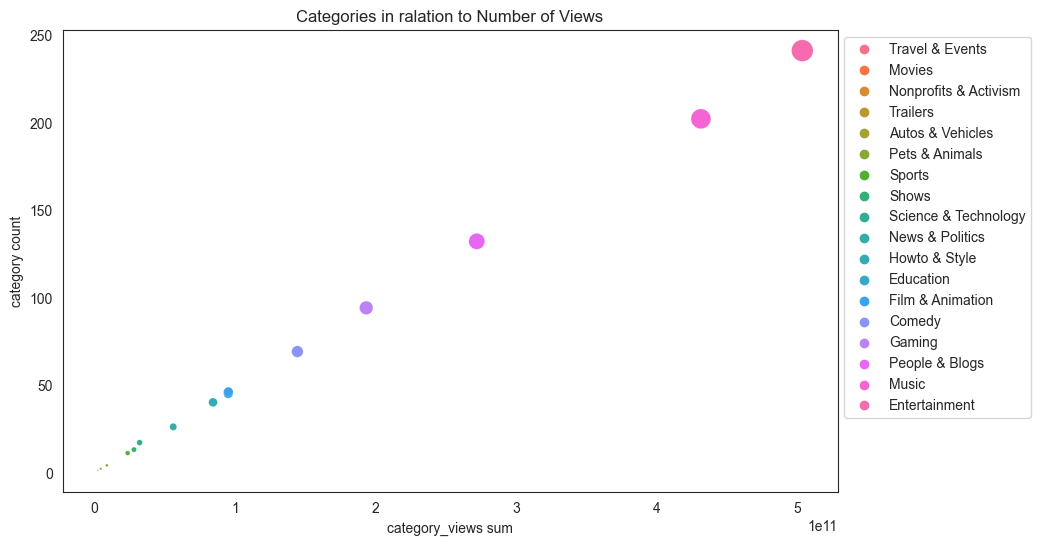

In [29]:
mp.figure(figsize=(10, 6))
sns.set_style('white')
sns.scatterplot(data=x, x='category_views sum', y='category count', hue='category', s=x['category count'])
mp.legend(loc='upper left', bbox_to_anchor=(1, 1))
mp.title('Categories in ralation to Number of Views')
mp.show()

### The graph shows that the more videos you have, the more chances of getting more views.
The more entries you send the more chances of winning !!!